<a href="https://colab.research.google.com/github/mumorais/ENM_UnB-Analise_Modal/blob/main/_02_Analise_Modal_1GdL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dado um sistema 1GdL amortecido forçado descrito por:
$$m \ddot{u}(t) + c \dot{u}(t) + k u(t) = F(t)$$
onde a massa $m = 10 kg$, o amortecimento $c = 4Nm/s$ e rigidez $k = 1kN/m$, e forçamento $F(t) =10 \delta(t)$. Lembre-se que $ \delta(t) $ é o delta de Dirac.

Determine:

OBS: A entrega pode ser redigida no presente arquivo notebook Colab (.ipynb).

###(a) Parâmetros Modais
A frequências natural $\omega_n$ e a razão de amortecimento $\xi$ do sistema 1GdL;

In [ ]:
import numpy as np

m = 10
c = 4
k = 1000
#
wn =np.sqrt(k/m)
print("freq.natural wn:",wn)
cc = 2*m*wn
xi = c/cc
print("razão de amortecimento xi:",xi)
c = 2*xi*np.sqrt(k*m)
print("coeficiente de amortecimento c:",c)

freq.natural wn: 10.0
razão de amortecimento xi: 0.02
coeficiente de amortecimento c: 4.0


###(b) Solução Analítica Função Resposta Impulsiva (IRF)
 Seja $F(t) = F_\delta = 10 \delta(t)$, obtenha a resposta temporal analítica $u_\delta(t)$;



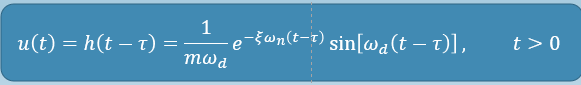

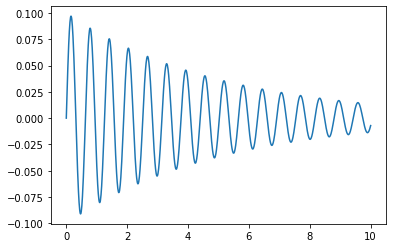

In [ ]:
import matplotlib.pyplot as plt

wd = wn*np.sqrt(1-xi**2)

t = np.linspace(0,10,1000)
u = 10*1/(m*wd)*np.exp(-xi*wn*t)*np.sin(wd*t)

plt.plot(t,u,)
plt.show()


### Integração Numérica
A integração numérica da equação diferential de segunda ordem $$m \ddot{u} + c \dot{u} + k u = F(t)$$ necessita de uma mudança de variável para transformar em um sistema de 1ª ordem (equação de estado). Abaixo temos um exemplo de código Python utilizando `odeint`. 

Estude o código abaixo para responder a próxima pergunta. Atentar para a routina principal (não se preocupe agora com a função `nGDLarb`.

In [ ]:
# Rotina nGdL para solução de sistema 1GdL
import numpy as np

def nGdLarb (z, t, Minv, KK, CC, tt, Ft, n):
  x = np.atleast_2d(z[0:  n]).T
  y = np.atleast_2d(z[n:2*n]).T
  
  F = np.interp(t,tt,Ft)

  # state variable
  dxdt = y        
  dydt = Minv @ (F - (CC@y + KK@x))
  dzdt = np.vstack((dxdt, dydt))

  return dzdt.flatten()

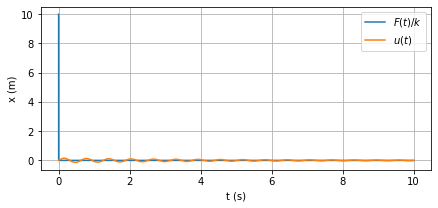

In [ ]:
# packages python_scientific
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# initial data
# SP - principal system
#m = 10.0                # massa         SP [kg]
#k = 1000.0              # stiffness     SP [N/m]
#xi = 1.00               # damping ratio SP [adim]
c = 2*xi*np.sqrt(k*m)   # damping coef. SP [N.s/m]

# dynamic matriz
MM = np.array([[m]])
KK = np.array([[k]])
CC = np.array([[c]])

F = np.array([[1]])
# initial conditions
x0 = np.array([0.0])
v0 = np.array([0.0])
z0 = np.concatenate((x0,v0))

# odeint solution
dt = 0.0010                  # step size
tini, tfin = (0.0, 10.0)     # final & initial time
nt = int((tfin-tini)/dt)    # number of time steps
tt = np.linspace(tini,tfin,nt)

# loading
t1= np.array([tini, tini+1.0*dt, tini+2.0*dt , tfin])
F1= 10*np.array([1/dt, 1/dt, 0.0,  0.0 ])

#
n = len(MM)
Minv = np.linalg.inv(MM)
z2 = odeint(nGdLarb, z0, tt, args=(Minv,KK,CC,t1,F1,n))

# ploting
plt.figure(figsize=(7,3))
plt.plot(t1, (1/k)*F1 ,label = r'$F(t)/k$')
plt.plot(tt, z2[:,0]  ,label = r'$u(t)$')
plt.legend(loc='upper right', prop={'size':10})
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.grid()
plt.show()




###(c) Comparação Numérico-Analítico
Compare a solução analítica $u_\delta (t)$ com a solução numérica $u_{\delta,h} (t)$ por integração numérica;

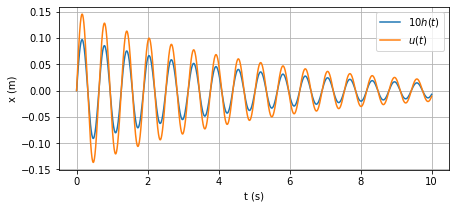

In [ ]:
# ploting
plt.figure(figsize=(7,3))
plt.plot(t, u ,label = r'$10 h(t)$')
plt.plot(tt, z2[:,0]  ,label = r'$u(t)$')
plt.legend(loc='upper right', prop={'size':10})
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.grid()
plt.show()

###(d) Transformada de Fourier Analítica
Descreva a transformada de Fourier analítica $ \hat{u}_\delta (\omega) = \mathfrak{F}_{\omega} [u_\delta (t)] $; 

### Transformada Rápida de Fourier
Não precisamos nos preocupar agora (vamos tratar mais na frente em Rudimentos de Processamento de Sinal). Mas abaixo temos um pequeno trecho para 

Pico de Frequencia f_peak: 1.600 Hz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


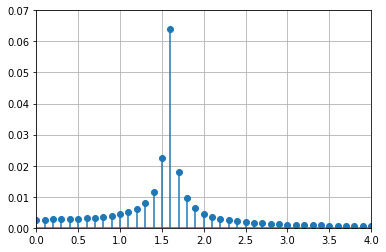

0.06413122256026793

In [ ]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = nt
# sample spacing
T = dt
x = t1
y = z2[:,0]
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

mY = (2.0/N * np.abs(yf[0:N//2])) # Find magnitude
peakY = np.max(mY) # Find max peak
locY = np.argmax(mY) # Find its location
frqY = xf[locY] # Get the actual frequency value
print("Pico de Frequencia f_peak: %5.3f Hz" % (frqY))

import matplotlib.pyplot as plt
plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.axis([0, 4, 0, 0.07])
plt.show()
peakY

Pico de Frequencia f_peak: 1.600 Hz


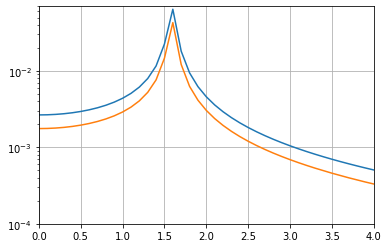

0.04286880433694324

In [ ]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 1000
# sample spacing
T = 0.01
x = t
y = u
yf1 = fft(y)
xf1 = fftfreq(N, T)[:N//2]

mY = (2.0/N * np.abs(yf1[0:N//2])) # Find magnitude
peakY = np.max(mY) # Find max peak
locY = np.argmax(mY) # Find its location
frqY = xf1[locY] # Get the actual frequency value
print("Pico de Frequencia f_peak: %5.3f Hz" % (frqY))

import matplotlib.pyplot as plt
plt.semilogy(xf , 2.0/nt * np.abs( yf[0:nt//2]))
plt.semilogy(xf1, 2.0/N * np.abs(yf1[0:N//2]))
plt.grid()
plt.axis([0, 4, 0.0001, 0.07])
plt.show()
peakY